In [1]:
import pandas as pd
import numpy as np

In [2]:
class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = pd.read_csv(self.file_path)
        self.train = None
        self.test = None
    
    def get_info(self):
        # get the detailed information of the origin dataset
        return self.data.info()
    
    def show_data(self):
        # show the first 5 rows of the origin dataset
        return self.data.head()

In [3]:
# Load dataset
file_path = "/Users/daisyoung/Downloads/Crime_Data_from_2020_to_Present.csv"
dataloader = DataLoader(file_path)
df = dataloader.data

In [4]:
dataloader.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970760 entries, 0 to 970759
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           970760 non-null  int64  
 1   Date Rptd       970760 non-null  object 
 2   DATE OCC        970760 non-null  object 
 3   TIME OCC        970760 non-null  int64  
 4   AREA            970760 non-null  int64  
 5   AREA NAME       970760 non-null  object 
 6   Rpt Dist No     970760 non-null  int64  
 7   Part 1-2        970760 non-null  int64  
 8   Crm Cd          970760 non-null  int64  
 9   Crm Cd Desc     970760 non-null  object 
 10  Mocodes         829240 non-null  object 
 11  Vict Age        970760 non-null  int64  
 12  Vict Sex        835948 non-null  object 
 13  Vict Descent    835938 non-null  object 
 14  Premis Cd       970746 non-null  float64
 15  Premis Desc     970177 non-null  object 
 16  Weapon Used Cd  325607 non-null  float64
 17  Weapon Des

In [5]:
class DataPreprocessor:
    def __init__(self, data):
        self.data = data
    
    def check_duplicated(self):
        # Check for the number of duplicated rows
        self.duplicates = self.data.duplicated().sum()
        return self.duplicates
    
    def drop_duplicated(self):
        # If duplicates found, drop them, keep first occurence
        if self.duplicates > 0:
            self.data.drop_duplicates(inplace = True)
        else:
            pass

    def check_missing_value(self):
        # Check for missing values in crime data
        self.missing_values = self.data.isnull().sum()
        return self.missing_values
    
    def handle_missing_values(self):
        # fill missing values in categorical columns with a string such as 'N/A'
        for column in self.data.select_dtypes(include=['object']):
            if self.missing_values[column] > 0:
                self.data[column] = self.data[column].fillna('N/A')
                
        # replacing the values ​​below one for the "Vict Age" column with NaN
        self.data.loc[self.data['Vict Age'] < 1, 'Vict Age'] = np.nan
        
        # delete rows with empty 'Crm Cd' or empty detailed location
        self.data = self.data.dropna(subset = ['Crm Cd', 'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'LAT', 'LON'])
        
        # delete columns with redundant information
        self.data = self.data.drop(columns = ['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'])
        

    def datetime_covertion(self):
        # convert 'Date Rptd' and 'DATE OCC' into datetime
        self.data['Date Rptd'] = pd.to_datetime(self.data['Date Rptd'], format = '%m/%d/%Y %I:%M:%S %p')
        self.data['DATE OCC'] = pd.to_datetime(self.data['DATE OCC'], format = '%m/%d/%Y %I:%M:%S %p')

        # extract year, month and day of the week from datetime
        self.data['Year OCC'] = self.data['DATE OCC'].dt.year
        self.data['Month OCC'] = self.data['DATE OCC'].dt.month
        self.data['Day OCC'] = self.data['DATE OCC'].dt.day
        self.data['DayofWeek'] = self.data['DATE OCC'].dt.day_name()

In [6]:
# Pre-processing dataset
preprocessor = DataPreprocessor(df)
duplicates_count = preprocessor.check_duplicated()
print(f"Number of duplicated rows: {duplicates_count}")
preprocessor.check_missing_value()

Number of duplicated rows: 0


DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           141520
Vict Age               0
Vict Sex          134812
Vict Descent      134822
Premis Cd             14
Premis Desc          583
Weapon Used Cd    645153
Weapon Desc       645153
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          902042
Crm Cd 3          968456
Crm Cd 4          970696
LOCATION               0
Cross Street      820124
LAT                    0
LON                    0
dtype: int64

In [7]:
preprocessor.handle_missing_values()
preprocessor.check_missing_value()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
LOCATION          0
LAT               0
LON               0
dtype: int64

In [9]:
preprocessor.datetime_covertion()
df = preprocessor.data
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON,Year OCC,Month OCC,Day OCC,DayofWeek
9,211904005,2020-12-31,2020-12-31,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9000 CEDROS AV,34.2336,-118.4535,2020,12,31,Thursday
11,221908151,2022-04-12,2020-10-01,1,19,Mission,1988,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,13400 RANGOON ST,34.2285,-118.4258,2020,10,1,Thursday
12,230204214,2023-01-05,2020-02-01,800,2,Rampart,201,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,900 N MARIPOSA AV,34.0868,-118.2991,2020,2,1,Saturday
17,210705560,2020-11-27,2020-11-27,1800,7,Wilshire,776,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,VEHICLE,AA,Adult Arrest,4500 LOMITA ST,34.0452,-118.3351,2020,11,27,Friday
21,231907172,2023-03-21,2020-03-15,1200,19,Mission,1983,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,8500 COLUMBUS AV,34.2246,-118.4654,2020,3,15,Sunday


In [10]:
class FeartureEngineering:
    def __init__(self, data, file_path):
        self.data = data
        self.file_path = file_path
        self.code2category = pd.read_csv(self.file_path)[['Crm Cd', 'Category']]
        
    def code_mapping(self):
        # merge the original data with category data
        self.data = pd.merge(self.data, self.code2category, on = 'Crm Cd')

In [11]:
file_path = "/Users/daisyoung/Downloads/Crime_Category.csv"
featureengineering = FeartureEngineering(df, file_path)
featureengineering.code2category

,Crm Cd,Category
0,230,AGG. ASSAULTS
1,231,AGG. ASSAULTS
2,235,AGG. ASSAULTS
3,236,AGG. ASSAULTS (DV)
4,250,AGG. ASSAULTS (DV)
...,...,...
134,949,All Other Offenses
135,950,FRAUD
136,951,FRAUD
137,954,All Other Offenses


In [17]:
featureengineering.code_mapping()
df = featureengineering.data
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION',
       'LAT', 'LON', 'Year OCC', 'Month OCC', 'Day OCC', 'DayofWeek',
       'Category'],
      dtype='object')

In [22]:
# Convert 'TIME OCC' to string, and pad with zeros for consistency
df.loc[:, 'TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

# Create 'time_slot' column
def assign_time_slot(time_str):
    hour = int(time_str[:2])  # Extract the hour part
    if hour < 8:
        return 1  # 0:00 - 7:59
    elif hour < 16:
        return 2        # 8:00 - 15:59
    else:
        return 3        # 16:00 - 23:59

df.loc[:, 'time_slot'] = df['TIME OCC'].apply(assign_time_slot)

/var/folders/sn/ll4svn5s2dqfk5l2gnnh5z440000gn/T/ipykernel_87120/2282582771.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1220' '0001' '0800' ... '0720' '1510' '1500']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)


In [23]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,LOCATION,LAT,LON,Year OCC,Month OCC,Day OCC,DayofWeek,Category,time_slot
0,211904005,2020-12-31,2020-12-31,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,9000 CEDROS AV,34.2336,-118.4535,2020,12,31,Thursday,16,2
1,221908151,2022-04-12,2020-10-01,0001,19,Mission,1988,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,...,Invest Cont,13400 RANGOON ST,34.2285,-118.4258,2020,10,1,Thursday,14,1
2,230204214,2023-01-05,2020-02-01,0800,2,Rampart,201,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,Invest Cont,900 N MARIPOSA AV,34.0868,-118.2991,2020,2,1,Saturday,3,2
3,210705560,2020-11-27,2020-11-27,1800,7,Wilshire,776,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Adult Arrest,4500 LOMITA ST,34.0452,-118.3351,2020,11,27,Friday,0,3
4,231907172,2023-03-21,2020-03-15,1200,19,Mission,1983,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,Adult Other,8500 COLUMBUS AV,34.2246,-118.4654,2020,3,15,Sunday,3,2


In [24]:
df_1 = df.loc[df["AREA"] == 1]
df_1.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,LOCATION,LAT,LON,Year OCC,Month OCC,Day OCC,DayofWeek,Category,time_slot
17,230118041,2023-08-16,2020-08-27,2100,1,Central,132,1,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,...,Adult Other,800 W 1ST ST,34.0570,-118.2508,2020,8,27,Thursday,1,3
62,230110332,2020-11-26,2020-11-26,1000,1,Central,132,1,815,SEXUAL PENETRATION W/FOREIGN OBJECT,...,Adult Arrest,200 S OLIVE ST,34.0535,-118.2491,2020,11,26,Thursday,14,2
68,230126260,2023-12-11,2020-12-10,0800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,Invest Cont,1100 S GRAND AV,34.0415,-118.2620,2020,12,10,Thursday,4,2
86,230110262,2023-04-09,2020-07-17,2300,1,Central,182,1,121,"RAPE, FORCIBLE",...,Adult Other,1200 S GRAND AV,34.0401,-118.2633,2020,7,17,Friday,14,3
114,220106363,2022-02-10,2020-10-01,0300,1,Central,132,1,121,"RAPE, FORCIBLE",...,Invest Cont,200 S OLIVE ST,34.0535,-118.2491,2020,10,1,Thursday,14,1


## Feature Selection

In [25]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def train_lgb_model(data):
    # Encode categorical columns
    categorical_cols = ['Vict Sex', 'Vict Descent', 'Status', 'Category', 'time_slot']
    le = LabelEncoder()
    for col in categorical_cols:
        data[col] = le.fit_transform(data[col])

    # Define feature set (X) and target variable (y)
    columns_drop = ["DR_NO", "AREA NAME", "Date Rptd", "DATE OCC", "Rpt Dist No", "Part 1-2", "Crm Cd", "Crm Cd Desc", "Mocodes", "Premis Cd","Premis Desc", "Weapon Used Cd", "Weapon Desc", "Status Desc", "LOCATION", 'TIME OCC', 'time_slot']
    X = data.drop(columns=columns_drop, axis=1)
    X = pd.get_dummies(X, columns=["Vict Sex", "Vict Descent", "Status", "DayofWeek", "Category"], drop_first=True)
    y = data['time_slot']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a LightGBM model
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
    
    params = {
        'objective': 'multiclass',  # for classification
        'num_class': len(y.unique()),  # number of unique time slots
        'metric': 'multi_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
        'is_unbalance': True
    }

    model = lgb.train(params, train_data, 100)

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred_class = [np.argmax(x) for x in y_pred]  # Convert softmax probabilities to class predictions

    # Evaluate accuracy or other metrics
    print("Accuracy:", accuracy_score(y_test, y_pred_class))
    
    # Plot feature importance
    lgb.plot_importance(model, max_num_features=20, importance_type='split', figsize=(10, 6))
    plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 239579, number of used features: 48
[LightGBM] [Info] Start training from score -1.580675
[LightGBM] [Info] Start training from score -1.015449
[LightGBM] [Info] Start training from score -0.839505
Accuracy: 0.45110610234577175


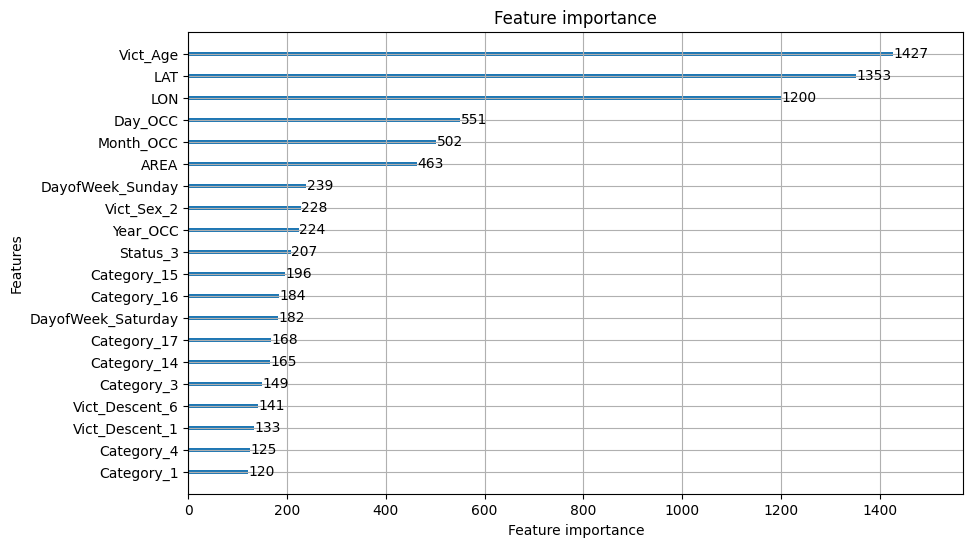

In [26]:
train_lgb_model(df)

## Time Slot Prediction

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
import pickle

def time_slot_prediction(data):

    X = data[['Month OCC', 'Day OCC', 'DayofWeek', 'LAT', 'LON']] # Features
    y = data['time_slot']  # Target variable
    
    # Convert 'Day OCC' to categorical encoding (one-hot encoding or ordinal encoding)
    X = pd.get_dummies(X, columns=['DayofWeek'], drop_first=True)
    # Encode the target variable (time_slot) to numeric values
    le = LabelEncoder()
    y = le.fit_transform(y)
    
    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Define a pipeline for each model (Random Forest, Gradient Boosting, XGBoost)
    def create_pipeline(model):
        return Pipeline([
            ('scaler', StandardScaler()),  # Scaling features
            ('classifier', model)
        ])

    # Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=42)
    rf_pipeline = create_pipeline(rf_model)

    # Gradient Boosting Classifier
    gb_model = GradientBoostingClassifier(random_state=42)
    gb_pipeline = create_pipeline(gb_model)

    # XGBoost Classifier
    xgb_model = XGBClassifier(random_state=42)
    xgb_pipeline = create_pipeline(xgb_model)

    # Prepare the parameter grids for hyperparameter tuning
    param_grid_rf = {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
        'classifier__class_weight': ['balanced', None]
    }

    param_grid_gb = {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_weight_fraction_leaf': [0.0, 0.01]
    }

    param_grid_xgb = {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__max_depth': [3, 5, 7]
    }

    # Cross-validation using StratifiedKFold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform Grid Search for Random Forest
    grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search_rf.fit(X_train, y_train)

    # Perform Grid Search for Gradient Boosting
    grid_search_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search_gb.fit(X_train, y_train)

    # Perform Grid Search for XGBoost
    grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search_xgb.fit(X_train, y_train)

    # Best Model Evaluation (Random Forest)
    best_rf_model = grid_search_rf.best_estimator_
    rf_pred = best_rf_model.predict(X_test)
    print("Random Forest Results:")
    print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
    print(classification_report(y_test, rf_pred))

    # Best Model Evaluation (Gradient Boosting)
    best_gb_model = grid_search_gb.best_estimator_
    gb_pred = best_gb_model.predict(X_test)
    print("Gradient Boosting Results:")
    print(f"Accuracy: {accuracy_score(y_test, gb_pred)}")
    print(classification_report(y_test, gb_pred))

    # Best Model Evaluation (XGBoost)
    best_xgb_model = grid_search_xgb.best_estimator_
    xgb_pred = best_xgb_model.predict(X_test)
    print("XGBoost Results:")
    print(f"Accuracy: {accuracy_score(y_test, xgb_pred)}")
    print(classification_report(y_test, xgb_pred))
    
    # Save the best model (based on the best performance)
    best_model = None
    best_accuracy = 0

    # Choose the best model based on accuracy
    if accuracy_score(y_test, rf_pred) > best_accuracy:
        best_model = best_rf_model
        best_accuracy = accuracy_score(y_test, rf_pred)
        model_name = "Random Forest"
    if accuracy_score(y_test, gb_pred) > best_accuracy:
        best_model = best_gb_model
        best_accuracy = accuracy_score(y_test, gb_pred)
        model_name = "Gradient Boosting"
    if accuracy_score(y_test, xgb_pred) > best_accuracy:
        best_model = best_xgb_model
        best_accuracy = accuracy_score(y_test, xgb_pred)
        model_name = "XGBoost"

    # Print which model was selected as the best
    print(f"The best model is: {model_name} with accuracy: {best_accuracy}")

    # Save the best model using pickle
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    print("Best model saved as 'best_model.pkl'")

In [32]:
time_slot_prediction(df)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Random Forest Results:
Accuracy: 0.4333249853911011
              precision    recall  f1-score   support

           0       0.45      0.01      0.01     12332
           1       0.41      0.01      0.03     21687
           2       0.43      0.99      0.60     25876

    accuracy                           0.43     59895
   macro avg       0.43      0.34      0.21     59895
weighted avg       0.43      0.43      0.27     59895

Gradient Boosting Results:
Accuracy: 0.4440604391017614
              precision    recall  f1-score   support

           0       0.46      0.02      0.04     12332
           1       0.44      0.15      0.23     21687
           2       0.44      0.89      0.59     25876

    accuracy                           0.44     59895
   macro avg       0.45      0.35      0.29     59895


In [30]:
time_slot_prediction(df_1)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Random Forest Results:
Accuracy: 0.4358858178522882
              precision    recall  f1-score   support

           0       0.43      0.03      0.05      1070
           1       0.45      0.56      0.50      1652
           2       0.43      0.57      0.49      1692

    accuracy                           0.44      4414
   macro avg       0.43      0.39      0.34      4414
weighted avg       0.43      0.44      0.39      4414

Gradient Boosting Results:
Accuracy: 0.42908926144086995
              precision    recall  f1-score   support

           0       0.43      0.13      0.20      1070
           1       0.44      0.55      0.49      1652
           2       0.42      0.50      0.46      1692

    accuracy                           0.43      4414
   macro avg       0.43      0.39      0.38      4414

In [31]:
# Load the list of hotspot
file_path = '/Users/daisyoung/Downloads/area1_clusters.pkl'

with open(file_path, 'rb') as file:
    central_hotspots = pickle.load(file)

df_cc = central_hotspots[["LAT", "LON", "dbscan_clusters"]].groupby(["LAT", "LON"]).count().sort_values(by="dbscan_clusters", ascending=False)
df_cc

,,dbscan_clusters
LAT,LON,
34.0466,-118.2520,193
34.0483,-118.2631,10
34.0423,-118.2561,1
34.0461,-118.2475,1
34.0480,-118.2438,1
34.0492,-118.2391,1
34.0566,-118.2531,1
34.0601,-118.2502,1
34.0628,-118.2396,1
